In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# **Tassk 1: data wranling I**

### **Load Data Set**

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **2. Handle Missing Values:**

In [ ]:
# Check missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.shape

(891, 12)

In [ ]:
# Use mean imputation for the 'Age' column.
mean_age = df['Age'].mean()
mean_age

29.69911764705882

In [ ]:
# Replace NaN value with mean
df['Age'] = df['Age'].replace(np.nan,mean_age)

In [ ]:
mode_emba = df['Embarked'].mode()[0]

In [ ]:
# Replace NaN value with mean
df['Embarked'] = df['Embarked'].replace(np.nan,mode_emba)

In [ ]:
df.isnull().sum()
# In this data set i have no any null or NaN value in Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [ ]:
mode_age = df['Age'].mode()

In [ ]:
df['Cabin_na'] = df['Cabin'].isnull().astype('int')

In [ ]:
# Drop the 'Cabin' column due to a high percentage of missing values.
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_na
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,1
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,C,1


### **3. Data Type Conversion:**

In [ ]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
Cabin_na         int64
dtype: object

In [ ]:
df['Pclass']

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64

In [ ]:
df['Pclass'].unique()

array([3, 1, 2])

In [ ]:
df['Pclass'] = df['Pclass'].astype('category')

### **4. Normalization/Scaling:**

#### **data ko kareb kareb lena means 2 column hn to dono ko hi 0 or 1 ka value ma lana taka hmara model kisi ek column ko zyada ahmeyat na da**

In [ ]:
value= df['Fare'].head()
value


0     7.2500
1    71.2833
2     7.9250
3    53.1000
4     8.0500
Name: Fare, dtype: float64

In [ ]:
min_fare = df['Fare'].min()
max_fare = df['Fare'].max()
print(f'This is min value of Fare {min_fare}\nThis is max value of fare {max_fare}')

This is min value of Fare 0.0
This is max value of fare 512.3292


In [ ]:
# Applying mix-max scaling
# df['Fare'] = (value - min_fare)/(max_fare-min_fare)
# df['Fare'].head()

In [ ]:
# Z-score method for practice (Its range 0 to 3)
value = (value-df['Fare'].mean())/value.std()
value

0   -0.817902
1    1.280861
2   -0.795778
3    0.684883
4   -0.791681
Name: Fare, dtype: float64

### **5. Encoding Categorical Variables:**

In [ ]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
pd.get_dummies(df[['Sex','Embarked']]).astype('int')

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1
...,...,...,...,...,...
886,0,1,0,0,1
887,1,0,0,0,1
888,1,0,0,0,1
889,0,1,1,0,0


In [ ]:
# Use pd.get_dummies() to create binary columns for 'Sex' and 'Embarked'
# One-hot encode the 'Sex' and 'Embarked' columns.
encoded_sex = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=False)
encoded_embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=False)

In [ ]:
encoded_sex = encoded_sex.astype(int)
encoded_embarked = encoded_embarked.astype(int)

In [ ]:
encoded_sex

,Sex_female,Sex_male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [ ]:
encoded_embarked

,Embarked_C,Embarked_Q,Embarked_S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


In [ ]:
# we can chamge the value of sex into numirical
df['Sex']= df['Sex'].replace('female',1).replace('male',0).astype('int')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_na
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,S,1
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,C,0


In [ ]:
df['Embarked'] = df['Embarked'].replace('Q',0).replace('S',1).replace('C',2).astype('int')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_na
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1,1


# **Task 2: Data Wrangling II**

## **1. Feature Creation:**

###  Create a new column 'FamilySize' by summing 'SibSp' and 'Parch' plus one.

In [ ]:
df[['SibSp', 'Parch']]

,SibSp,Parch
0,1,0
1,1,0
2,0,0
3,1,0
4,0,0
...,...,...
886,0,0
887,0,0
888,1,2
889,0,0


In [ ]:
# we add 1 include the passenger in this count thus giving us the total family size
df['FamilySize']=df['SibSp']+df['Parch']+1

In [ ]:
df['FamilySize'].head(10)

0    2
1    2
2    1
3    2
4    1
5    1
6    1
7    5
8    3
9    2
Name: FamilySize, dtype: int64

###  Create a new binary column 'IsAlone' (1 if FamilySize == 1, else 0).

In [ ]:
df['IsAlone'] = df['FamilySize'].apply(lambda x: 1 if x == 1 else 0)

In [ ]:
df['IsAlone'].head(10)

0    0
1    0
2    1
3    0
4    1
5    1
6    1
7    0
8    0
9    0
Name: IsAlone, dtype: int64

## **2. Log Transformation:**

#### **Apply a log transformation to the 'Fare' column to handle skewness.**

In [ ]:
# df['Fare'].skew()

In [ ]:
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [ ]:
df['Fare'] = df['Fare'].apply(lambda x: x+1 if x == 0 or x=='NaN' else x)
df['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [ ]:
df['LogFare'] = np.log(df['Fare'])
df['LogFare']

0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: LogFare, Length: 891, dtype: float64

In [ ]:
df[['Fare','LogFare']].head(10)

,Fare,LogFare
0,7.2500,1.981001
1,71.2833,4.266662
2,7.9250,2.070022
3,53.1000,3.972177
4,8.0500,2.085672
5,8.4583,2.135148
6,51.8625,3.948596
7,21.0750,3.048088
8,11.1333,2.409941
9,30.0708,3.403555


## **3. Regular Expressions:**

### Extract titles from the 'Name' column and create a new column 'Title'.

In [ ]:
import re

In [ ]:
pattren = r'([A-Za-z]+)\.'

In [ ]:
df['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [ ]:
df['Title'] = df['Name'].str.extract(pattren)
df['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [ ]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
df[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


## **4. Duplicate Handling and Outliers:**

####  **- Check for and remove duplicate rows.**

In [ ]:
df.duplicated().sum()


0

In [ ]:
df = df.drop_duplicates()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_na,FamilySize,IsAlone,LogFare,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,1,1,2,0,1.981001,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,2,0,2,0,4.266662,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,1,1,1,1,2.070022,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,1,0,2,0,3.972177,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,1,1,1,1,2.085672,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,1,1,1,1,2.564949,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,1,0,1,1,3.401197,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,1,1,4,0,3.154870,Miss
889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,2,0,1,1,3.401197,Mr


#### **Detect and handle outliers in the 'Fare' and 'Age' columns using the IQR method.**

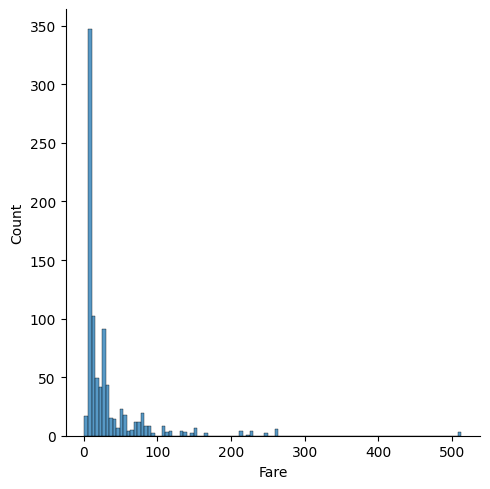

In [ ]:
sns.displot(df['Fare'])

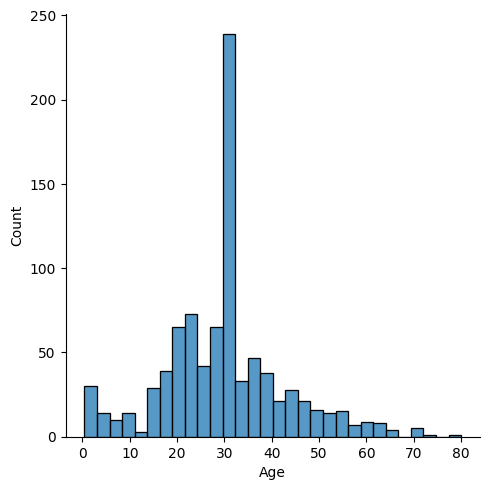

In [ ]:
sns.displot(df['Age'])

<Axes: ylabel='Fare'>

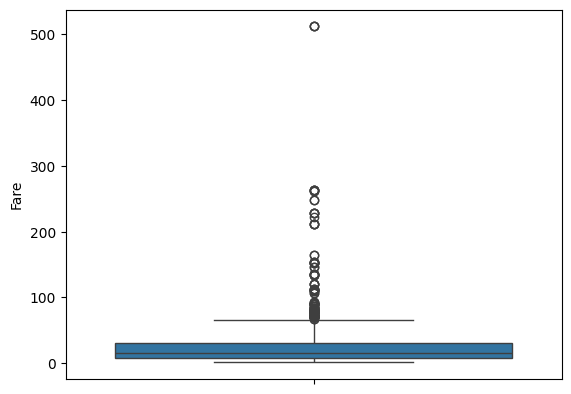

In [ ]:
sns.boxplot(df['Fare'])

<Axes: ylabel='Age'>

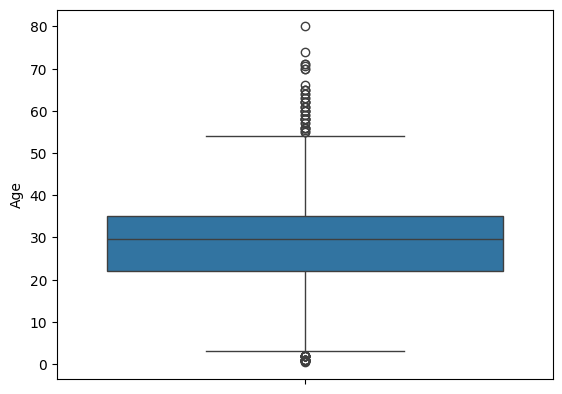

In [ ]:
sns.boxplot(df['Age'])

##### **IQR method apply on Fare column**




In [ ]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3-Q1

In [ ]:
Q1,Q3,IQR

(7.9104, 31.0, 23.0896)

In [ ]:
lower_bound = Q1 -( 1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
lower_bound,upper_bound

(-26.724, 65.6344)

In [ ]:
# find the outlier
df.loc[(df['Fare']>upper_bound) | (df['Fare']<lower_bound)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_na,FamilySize,IsAlone,LogFare,Title
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,2,0,2,0,4.266662,Mrs
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.000000,3,2,19950,263.0000,1,0,6,0,5.572154,Mr
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,29.699118,1,0,PC 17569,146.5208,2,0,2,0,4.987167,Mrs
34,35,0,1,"Meyer, Mr. Edgar Joseph",0,28.000000,1,0,PC 17604,82.1708,2,1,2,0,4.408800,Mr
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",1,49.000000,1,0,PC 17572,76.7292,2,0,2,0,4.340282,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",0,29.699118,8,2,CA. 2343,69.5500,1,1,11,0,4.242046,Mr
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",1,29.699118,1,0,17453,89.1042,2,0,2,0,4.489806,Mrs
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",1,45.000000,1,1,36928,164.8667,1,1,3,0,5.105137,Mrs
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,29.699118,8,2,CA. 2343,69.5500,1,1,11,0,4.242046,Miss


In [ ]:
df = df.loc[(df['Fare']<upper_bound) & (df['Fare']>lower_bound)]
print("Before removing outlier: ",len(df))
print("After removing outlier: ",len(df))
print("Outlier:",len(df)-len(df))

Before removing outlier:  775
After removing outlier:  775
Outlier: 0


In [ ]:
df.shape,df.shape

((775, 16), (775, 16))

<Axes: ylabel='Fare'>

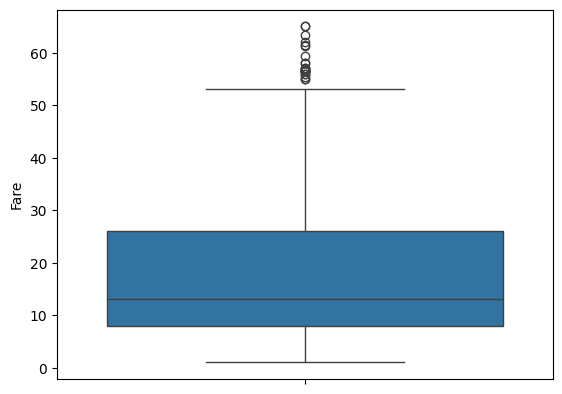

In [ ]:
sns.boxplot(new_df['Fare'])

##### **IQR method apply on Age column**

In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3-Q1

In [ ]:
Q1,Q3,IQR

(22.0, 34.0, 12.0)

In [ ]:
lower_bound = Q1 -( 1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
lower_bound,upper_bound

(4.0, 52.0)

In [ ]:
# find the outlier
df.loc[(df['Age']>upper_bound) | (df['Fare']<lower_bound)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_na,FamilySize,IsAlone,LogFare,Title
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,17463,51.8625,1,0,1,1,3.948596,Mr
11,12,1,1,"Bonnell, Miss. Elizabeth",1,58.000000,0,0,113783,26.5500,1,0,1,1,3.279030,Miss
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",1,55.000000,0,0,248706,16.0000,1,1,1,1,2.772589,Mrs
33,34,0,2,"Wheadon, Mr. Edward H",0,66.000000,0,0,C.A. 24579,10.5000,1,1,1,1,2.351375,Mr
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",0,65.000000,0,1,113509,61.9792,2,0,2,0,4.126799,Mr
94,95,0,3,"Coxon, Mr. Daniel",0,59.000000,0,0,364500,7.2500,1,1,1,1,1.981001,Mr
96,97,0,1,"Goldschmidt, Mr. George B",0,71.000000,0,0,PC 17754,34.6542,2,0,1,1,3.545419,Mr
116,117,0,3,"Connors, Mr. Patrick",0,70.500000,0,0,370369,7.7500,0,1,1,1,2.047693,Mr
152,153,0,3,"Meo, Mr. Alfonzo",0,55.500000,0,0,A.5. 11206,8.0500,1,1,1,1,2.085672,Mr
170,171,0,1,"Van der hoef, Mr. Wyckoff",0,61.000000,0,0,111240,33.5000,1,0,1,1,3.511545,Mr


In [ ]:
# Trim data
new_df = df.loc[(df['Age']<upper_bound) & (df['Age']>lower_bound)]
print("Before removing outlier: ",len(df))
print("After removing outlier: ",len(new_df))
print("Outlier:",len(df)-len(new_df))

Before removing outlier:  775
After removing outlier:  696
Outlier: 79


In [ ]:
df.shape,new_df.shape

((775, 16), (696, 16))

<Axes: ylabel='Age'>

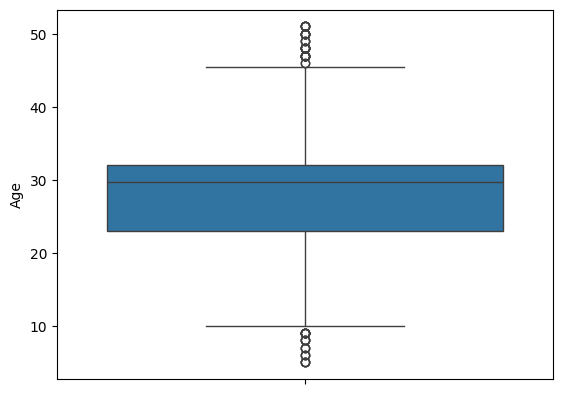

In [ ]:
sns.boxplot(new_df['Age'])

In [ ]:
#capping -
new_df = df.copy()
df.loc[(new_df['Age']>upper_bound),'Age'] = upper_bound
df.loc[(new_df['Age']<lower_bound),'Age'] = lower_bound


In [ ]:
df.shape,new_df.shape

((775, 16), (775, 16))

<Axes: ylabel='Age'>

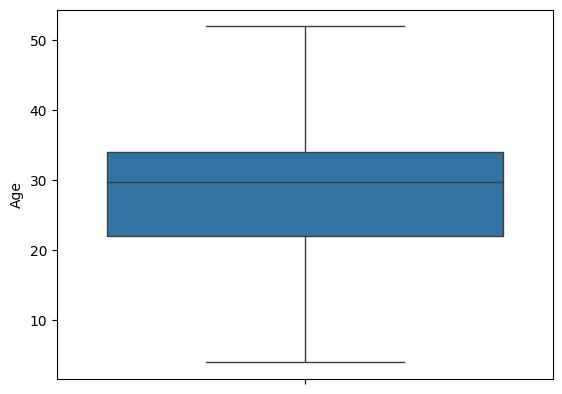

In [ ]:
sns.boxplot(df['Age'])

# **Part 2: Exploratory Data Analysis (EDA)**

## **Task 1: Exploratory Data Analysis I**

In [ ]:
# Summary Statistics:
df.describe()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_na,FamilySize,IsAlone,LogFare
count,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000,775.000000
mean,445.806452,0.339355,0.314839,28.743557,0.437419,0.340645,17.841446,1.052903,0.852903,1.778065,0.649032,2.620933
std,260.116285,0.473796,0.464752,11.509080,0.899838,0.785914,13.553325,0.493931,0.354431,1.416873,0.477581,0.741304
min,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,213.500000,0.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000,1.000000,1.000000,0.000000,2.066331
50%,450.000000,0.000000,0.000000,29.699118,0.000000,0.000000,13.000000,1.000000,1.000000,1.000000,1.000000,2.564949
75%,670.500000,1.000000,1.000000,34.000000,1.000000,0.000000,26.000000,1.000000,1.000000,2.000000,1.000000,3.258097
max,891.000000,1.000000,1.000000,52.000000,5.000000,6.000000,65.000000,2.000000,1.000000,8.000000,1.000000,4.174387


#### Visualization of Numerical Features:

#### Hit plot for Age

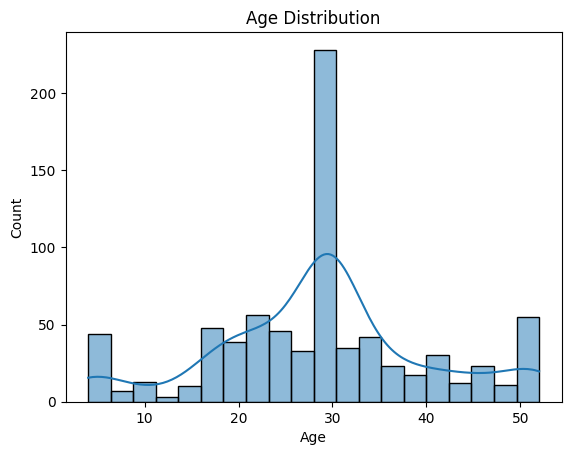

In [ ]:
# Age
sns.histplot(df['Age'] , kde=True,bins=20)
plt.title('Age Distribution')
plt.show()

#### Hit plot for Fare

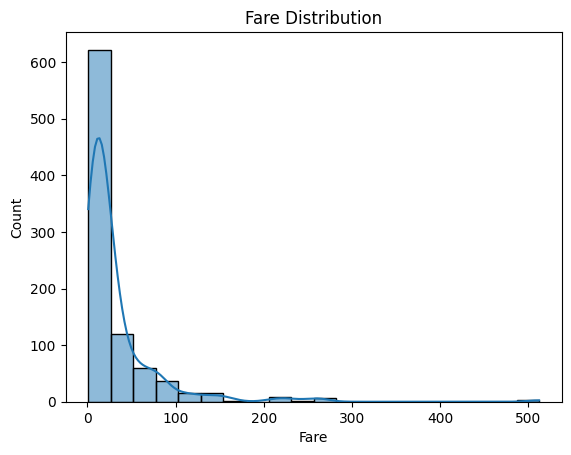

In [ ]:
# Fare
sns.histplot(df['Fare'] , kde=True,bins=20)
plt.title('Fare Distribution')
plt.show()

#### Hit plot for Family Size

In [ ]:
# FamilySize
sns.histplot(df['FamilySize'] , kde=True,bins=20)
plt.title('Family Size Distribution')
plt.show()

KeyError: 'FamilySize'

### Create box plots to visualize the distribution of 'Fare' and 'Age'.

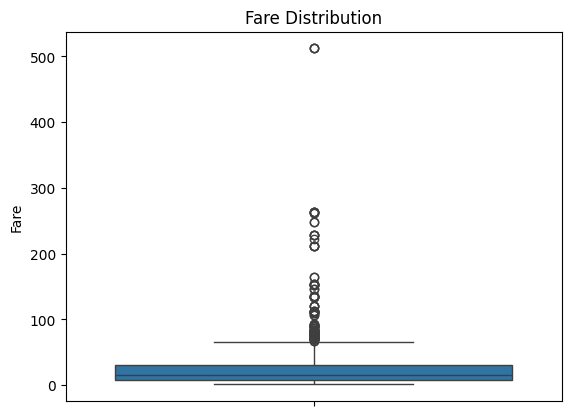

In [ ]:
# Fare
sns.boxplot(df['Fare'])
plt.title('Fare Distribution')
plt.show()

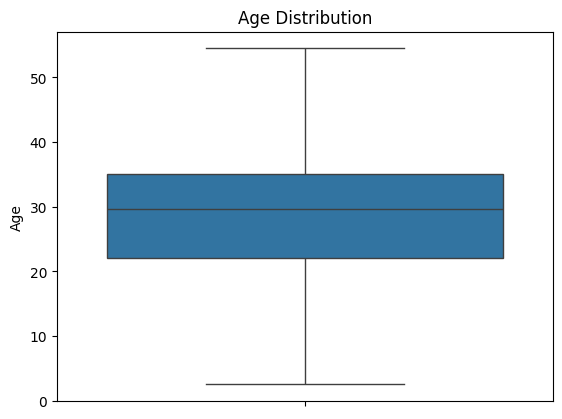

In [ ]:
# Age
sns.boxplot(df['Age'])
plt.title('Age Distribution')
plt.show()

### **Feature Relationships:**

#### Plot scatter plots to analyze the relationship between 'Fare' and 'Age'.

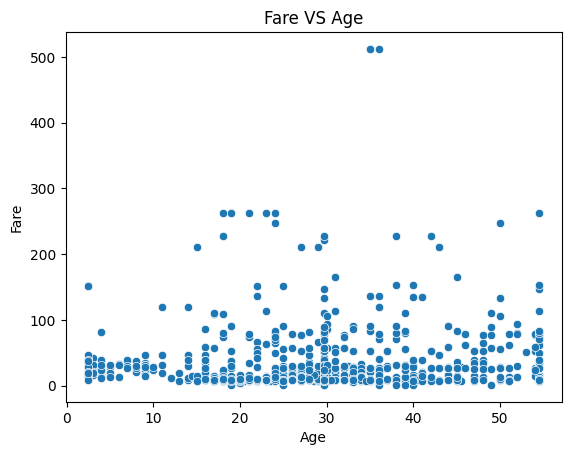

In [ ]:
sns.scatterplot(x='Age',y='Fare',data=df)
plt.title('Fare VS Age')
plt.show()

### heatmap of the correlation matrix.

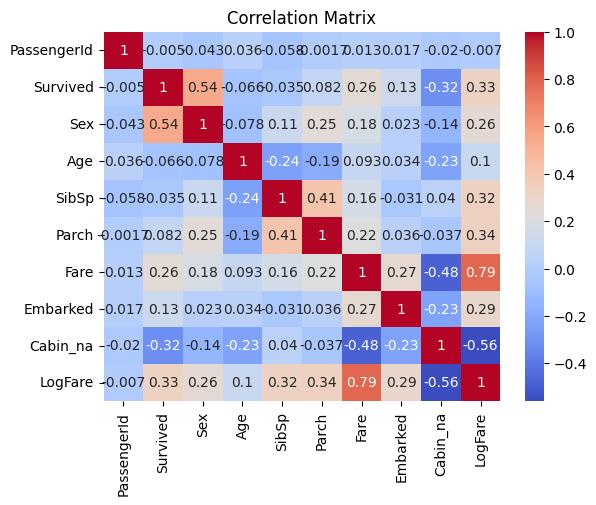

In [ ]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## **Task 2: Exploratory Data Analysis II**

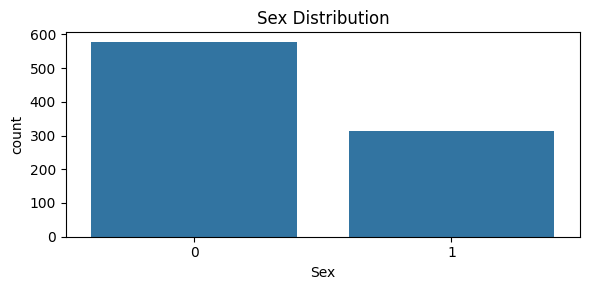

In [ ]:
# Plot bar for catogerical variable
plt.figure(figsize=(6,3))
sns.countplot(x='Sex',data=df)
plt.title('Sex Distribution')
plt.show()

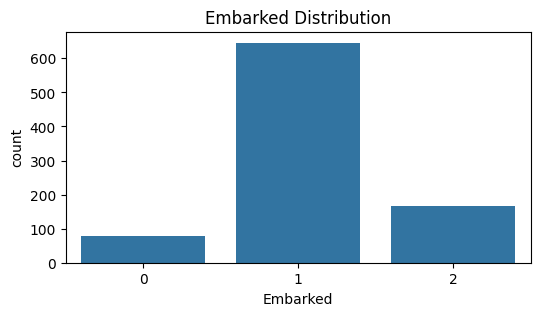

In [ ]:
# Plot bar for catogerical variable
plt.figure(figsize=(6,3))
sns.countplot(x='Embarked',data=df)
plt.title('Embarked Distribution')
plt.show()

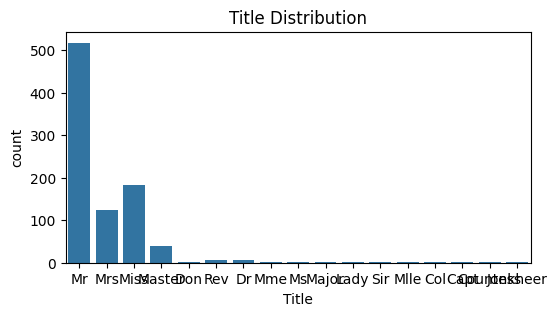

In [ ]:
# Plot bar for catogerical variable
plt.figure(figsize=(6,3))
sns.countplot(x='Title',data=df)
plt.title('Title Distribution')
plt.show()

#### **Interaction Analysis:**


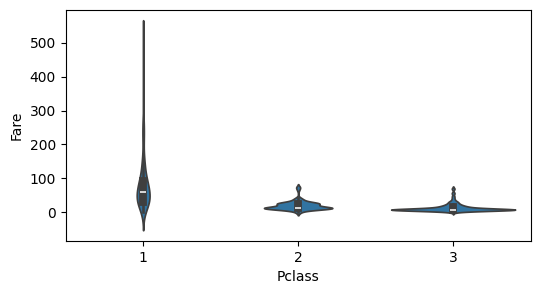

In [ ]:
#create violin plots for 'Pclass' and 'Fare'
plt.figure(figsize=(6,3))
sns.violinplot(x='Pclass',y='Fare',data = df)
plt.show()

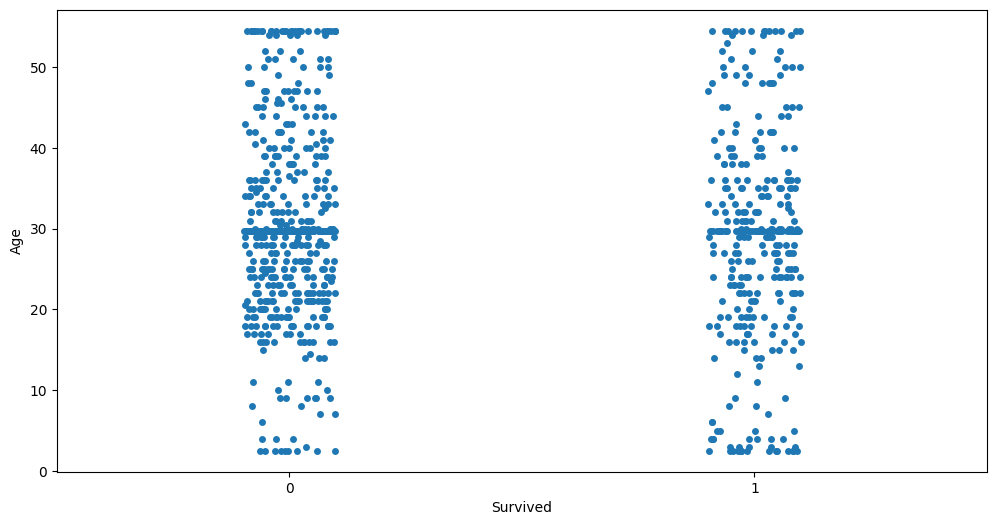

In [ ]:
# Plot swarm plots for 'Survived' vs 'Age'
plt.figure(figsize=(12,6))
sns.stripplot(x='Survived',y='Age',data = df)
plt.show()

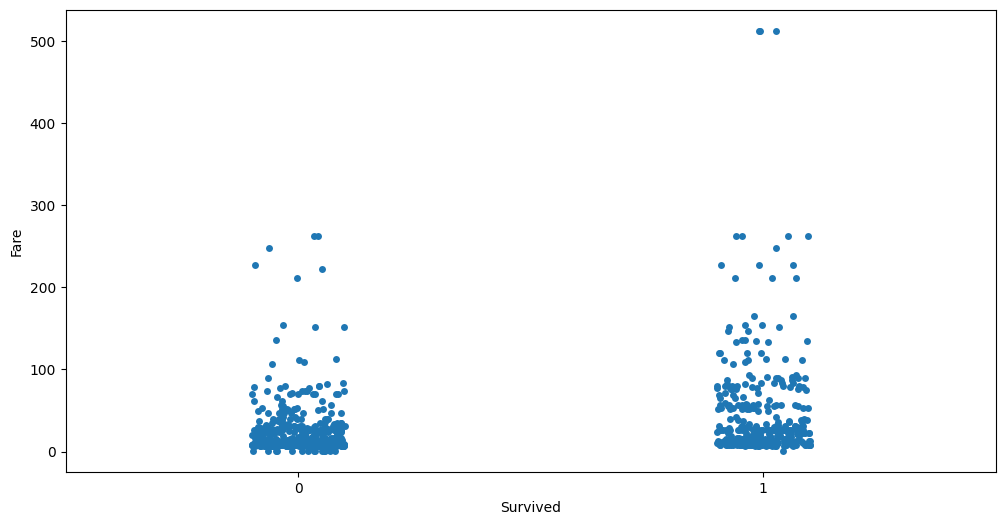

In [ ]:
# Plot swarm plots for 'Survived' vs 'Farre'
plt.figure(figsize=(12,6))
sns.stripplot(x='Survived',y='Fare',data = df)
plt.show()

### Feature Interactions:

<Figure size 1200x600 with 0 Axes>

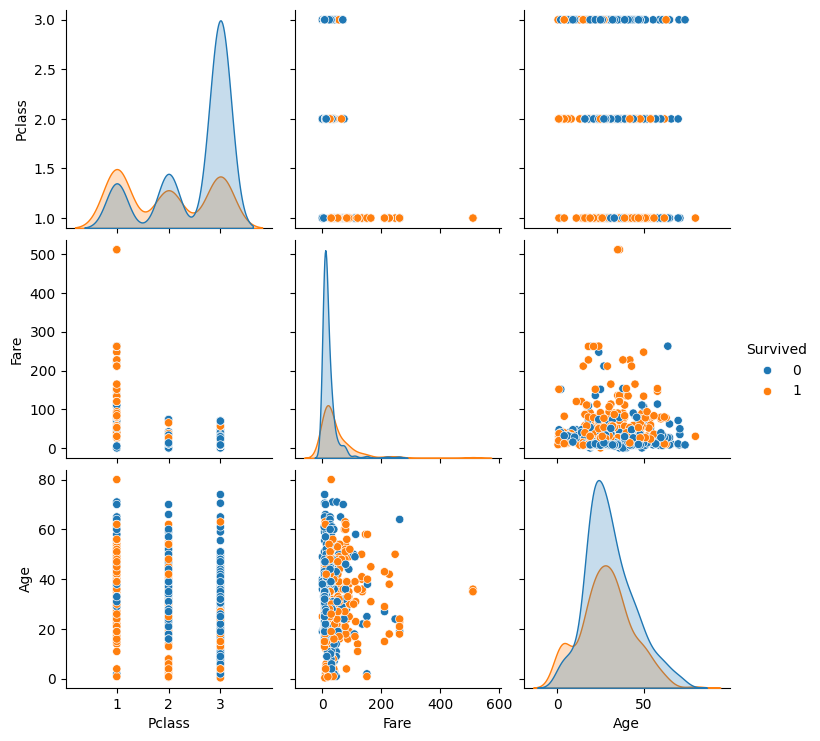

In [ ]:
columns = ['Pclass','Fare','Age','Survived']
# create pair plot
plt.figure(figsize=(12,6))
sns.pairplot(df[columns],hue='Survived')
plt.show()